## **Step - 1 :** *Importing Necessary Library and Dataset*

In [164]:
# Utility
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import re
import string
import pickle

# Plotting
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from wordcloud import WordCloud

# nltk
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

#tensorflow
import tensorflow as tf
import tensorflow_datasets as tfds

# sklearn
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB


In [165]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [166]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Project2/training.1600000.processed.noemoticon.csv',encoding='latin-1', names = ['polarity', 'id', 'date', 'query', 'user', 'text'])
data = data.sample(frac = 1)
data_copy_1 = data[:200000]

In [167]:
data_copy_1.head()

,polarity,id,date,query,user,text
1019419,4,1882194672,Fri May 22 06:25:04 PDT 2009,NO_QUERY,rubyjoh,@danmylo handwash with a detergent meant for d...
409322,0,2059617113,Sat Jun 06 17:17:32 PDT 2009,NO_QUERY,yana_ilina,@PrinceSsThaLia I envy u right now! I'm stuck...
258307,0,1985160322,Sun May 31 16:33:13 PDT 2009,NO_QUERY,ForeverPattyM,Just buried my cat.
1256192,4,1997443012,Mon Jun 01 16:51:32 PDT 2009,NO_QUERY,SonoranDragon,"@librarykitty I know, that's why they expelled..."
42432,0,1676095336,Fri May 01 21:05:11 PDT 2009,NO_QUERY,GennaClarke,feeling ordinary


In [168]:
data_copy_1.columns

Index(['polarity', 'id', 'date', 'query', 'user', 'text'], dtype='object')

In [169]:
type(data_copy_1['polarity'])

pandas.core.series.Series

## ***Data Visualization***

In [170]:
print(data_copy_1.shape)

(200000, 6)


In [171]:
data_copy_1['polarity'].unique()

array([4, 0])

In [172]:
data_copy_1['polarity'] = data_copy_1['polarity'].replace(4,1)

In [173]:
data.head(10)

,polarity,id,date,query,user,text
1019419,4,1882194672,Fri May 22 06:25:04 PDT 2009,NO_QUERY,rubyjoh,@danmylo handwash with a detergent meant for d...
409322,0,2059617113,Sat Jun 06 17:17:32 PDT 2009,NO_QUERY,yana_ilina,@PrinceSsThaLia I envy u right now! I'm stuck...
258307,0,1985160322,Sun May 31 16:33:13 PDT 2009,NO_QUERY,ForeverPattyM,Just buried my cat.
1256192,4,1997443012,Mon Jun 01 16:51:32 PDT 2009,NO_QUERY,SonoranDragon,"@librarykitty I know, that's why they expelled..."
42432,0,1676095336,Fri May 01 21:05:11 PDT 2009,NO_QUERY,GennaClarke,feeling ordinary
329587,0,2011521617,Tue Jun 02 19:09:04 PDT 2009,NO_QUERY,SebBeaubois,can't believe i'm missing Xchange again!! the ...
673597,0,2247535526,Fri Jun 19 19:14:35 PDT 2009,NO_QUERY,LaPaoSalmon,I just saw one of my friends pass through and ...
1309072,4,2012969839,Tue Jun 02 21:38:52 PDT 2009,NO_QUERY,KrsBonser,just wishing I had someone to tweet with
344361,0,2015654402,Wed Jun 03 05:12:27 PDT 2009,NO_QUERY,nikkix25,off to school again .. sadly . and disapointed...
1166529,4,1979944364,Sun May 31 05:07:07 PDT 2009,NO_QUERY,caitlinharnett,@dana_burgess did you have fun!?


In [174]:
data_copy_1.describe()

,polarity,id
count,200000.000000,2.000000e+05
mean,0.500810,1.999056e+09
std,0.500001,1.928802e+08
min,0.000000,1.467812e+09
25%,0.000000,1.957003e+09
50%,1.000000,2.002153e+09
75%,1.000000,2.176959e+09
max,1.000000,2.329205e+09


In [175]:
# check the number of positive vs. negative tagged sentences
positives = data_copy_1['polarity'][data.polarity == 1]
negatives = data_copy_1['polarity'][data.polarity == 0]

print(f'Toatal length of the data is: {data_copy_1.shape[0]}')
print(f'No. of positve tagged sentences is: {len(positives)}')
print(f'No. of negative tagged sentences is: {len(negatives)}')


Toatal length of the data is: 200000
No. of positve tagged sentences is: 0
No. of negative tagged sentences is: 99838


In [176]:
#get a word count per of text
def word_count(words):
    return len(words.split())

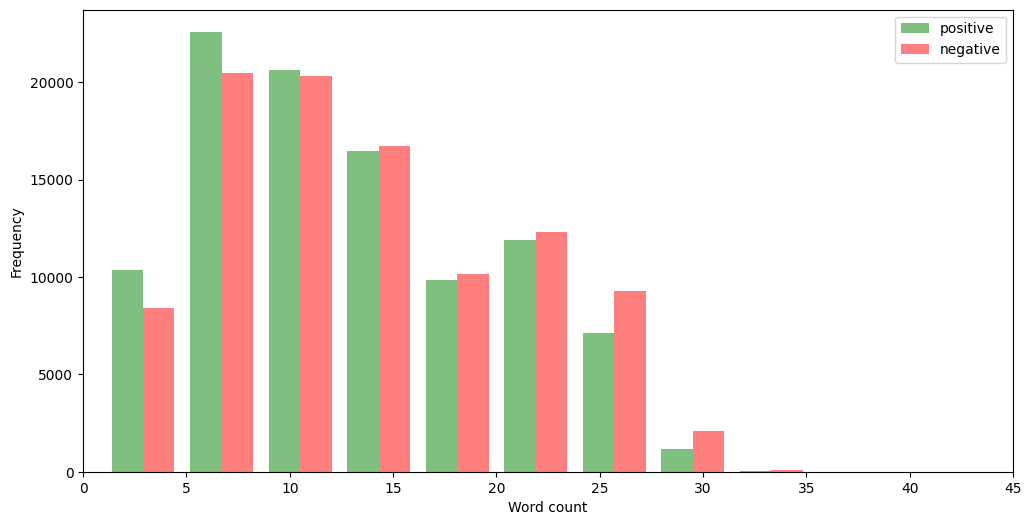

In [177]:
# plot word count distribution for both positive and negative

data_copy_1['word count'] = data_copy_1['text'].apply(word_count)
p = data_copy_1['word count'][data_copy_1.polarity == 1]
n = data_copy_1['word count'][data_copy_1.polarity == 0]

plt.figure(figsize = (12,6))
plt.xlim(0,45)
plt.xlabel('Word count')
plt.ylabel('Frequency')
g = plt.hist([p,n], color = ['g', 'r'], alpha = 0.5, label = ['positive', 'negative'])
plt.legend(loc = 'upper right')


In [178]:
data_copy_1.columns

Index(['polarity', 'id', 'date', 'query', 'user', 'text', 'word count'], dtype='object')

In [179]:
# get common words in training dataset

from collections import Counter
all_words = []
for line in list(data_copy_1['text']):
    words = line.split()
    for word in words:
        if(len(word)>2):
            all_words.append(word.lower())

Counter(all_words).most_common(30)

[('the', 64794),
 ('and', 37219),
 ('you', 29897),
 ('for', 26831),
 ('have', 18129),
 ('that', 16011),
 ("i'm", 15976),
 ('just', 15665),
 ('but', 15549),
 ('with', 14276),
 ('was', 12872),
 ('not', 12817),
 ('this', 11051),
 ('get', 10116),
 ('good', 9698),
 ('are', 9473),
 ('like', 9441),
 ('all', 9221),
 ('out', 8823),
 ("it's", 8172),
 ('your', 8118),
 ('going', 7916),
 ('now', 7894),
 ('got', 7644),
 ('day', 7450),
 ('love', 7408),
 ('from', 7020),
 ('will', 6336),
 ('work', 6175),
 ('back', 6171)]

## ***Data Preprocessing***

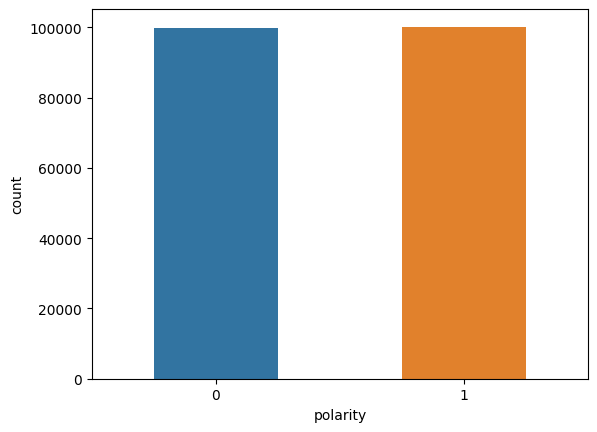

In [180]:
sns.countplot(x='polarity',data = data_copy_1,width = 0.5)
plt.show()

In [181]:
# Removing the unnecessary columns.
data_copy_1.drop(['date', 'query', 'user', 'word count'], axis=1, inplace = True)

In [182]:
data.head()

,polarity,id,date,query,user,text
1019419,4,1882194672,Fri May 22 06:25:04 PDT 2009,NO_QUERY,rubyjoh,@danmylo handwash with a detergent meant for d...
409322,0,2059617113,Sat Jun 06 17:17:32 PDT 2009,NO_QUERY,yana_ilina,@PrinceSsThaLia I envy u right now! I'm stuck...
258307,0,1985160322,Sun May 31 16:33:13 PDT 2009,NO_QUERY,ForeverPattyM,Just buried my cat.
1256192,4,1997443012,Mon Jun 01 16:51:32 PDT 2009,NO_QUERY,SonoranDragon,"@librarykitty I know, that's why they expelled..."
42432,0,1676095336,Fri May 01 21:05:11 PDT 2009,NO_QUERY,GennaClarke,feeling ordinary


In [183]:
data.drop('id', axis=1, inplace=True)

In [184]:
data.tail(10)

,polarity,date,query,user,text
1125564,4,Sat May 30 13:59:22 PDT 2009,NO_QUERY,gbastian,Heading to chill in the WLV train room. Did a ...
126522,0,Mon May 18 03:19:11 PDT 2009,NO_QUERY,lizwoolly,@willtomsett a whole week?! oh no! we'll miss ...
1328459,4,Wed Jun 03 04:52:23 PDT 2009,NO_QUERY,AnaRC,@bizopps Oh!! now we're talking thank you so ...
606687,0,Thu Jun 18 07:19:06 PDT 2009,NO_QUERY,manojkhiyani,@phpcamp nice design.. further you can experi...
234724,0,Sun May 31 03:55:20 PDT 2009,NO_QUERY,HfShibby,hope you're fine... haven't heard from you so ...
1327624,4,Wed Jun 03 04:35:32 PDT 2009,NO_QUERY,ThinGuy,The part of me that tweets &quot;To the gym!&q...
323941,0,Tue Jun 02 10:15:30 PDT 2009,NO_QUERY,AprilAnneChase,Totally frustrated!! It's definitely going to...
1008494,4,Fri May 22 02:33:44 PDT 2009,NO_QUERY,xXxTinkxXx,Is thinking should I use some match sticks to ...
114620,0,Sun May 17 08:22:39 PDT 2009,NO_QUERY,Cameronk_uk,Just been the gym... Only to find that its clo...
304425,0,Mon Jun 01 20:43:45 PDT 2009,NO_QUERY,lianoe,in the mood of going out....but i cant cause i...


In [185]:
#Checking if any null values is present or not
(data_copy_1.isnull().sum() / len(data_copy_1))*100

polarity    0.0
id          0.0
text        0.0
dtype: float64

In [186]:
#Converting pandas object to a string type
data_copy_1['text'] = data_copy_1['text'].astype('str')

In [187]:
type(data_copy_1['text'])

pandas.core.series.Series

In [188]:
nltk.download('stopwords')
stopword = set(stopwords.words('english'))
print(stopword)


{'had', 'does', 'there', 'couldn', 'during', 'so', 'very', 'mightn', 'that', 'your', 'haven', 'off', "mightn't", 'other', 'a', "shan't", 'in', 'ma', 've', 'herself', 'they', 'up', 'through', 'against', 'yours', 'can', 'hers', 'above', 's', 'she', 'it', 'y', 'each', 'here', 'now', 'my', 'such', 'our', 'over', 'are', 'who', 'an', 'and', 'should', 're', "you're", 'for', 'don', 'where', 'yourselves', 'their', 'won', 'these', 'own', "won't", "weren't", 'down', 'whom', 'm', "aren't", 'll', 'yourself', 'didn', 'but', 'itself', 'on', 'd', "mustn't", 'is', 'same', 'mustn', 'be', 'isn', 'between', 'which', 'no', 'wouldn', "needn't", 'to', 'has', 'those', 'hasn', 'after', 'just', 'than', 'some', "you'd", 'having', 'have', 'o', 'am', 'her', 'while', 'too', 'wasn', 'he', 'hadn', 'themselves', 'more', 'ourselves', "couldn't", 'under', 'i', 'what', "wouldn't", 'its', 'weren', 'this', "shouldn't", 'theirs', 'most', 'aren', 'himself', "it's", 'was', 'not', "wasn't", 'further', 'by', 'about', 'when', 's

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [189]:
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

> The Preprocessing steps taken are:

* Lower Casing: Each text is converted to lowercase.
* Removing URLs: Links starting with "http" or "https" or "www" are replaced by "".

* Removing Usernames: Replace @Usernames with word "". (eg: "@XYZ" to "")
* Removing Short Words: Words with length less than 2 are removed.
* Removing Stopwords: Stopwords are the English words which does not add much meaning to a sentence. They can safely be ignored without sacrificing the meaning of the sentence. (eg: "the", "he", "have")
* Lemmatizing: Lemmatization is the process of converting a word to its base form. (e.g: “wolves” to “wolf”)

In [190]:
urlPattern = r"((http://)[^ ]*|(https://)[^ ]*|( www\.)[^ ]*)"
userPattern = '@[^\s]+'
def process_tweets(tweet):
  # Lower Casing
    tweet = tweet.lower()
    tweet=tweet[1:]
    # Removing all URls
    tweet = re.sub(urlPattern,'',tweet)
    # Removing all @username.
    tweet = re.sub(userPattern,'', tweet)
    #Remove punctuations
    tweet = tweet.translate(str.maketrans("","",string.punctuation))
    #tokenizing words
    tokens = word_tokenize(tweet)
    #Removing Stop Words
    final_tokens = [w for w in tokens if w not in stopword]
    #reducing a word to its word stem
    wordLemm = WordNetLemmatizer()
    finalwords=[]
    for w in final_tokens:
      if len(w)>1:
        word = wordLemm.lemmatize(w)
        finalwords.append(word)
    return ' '.join(finalwords)

In [191]:
data_copy_1['processed_tweets'] = data_copy_1['text'].apply(lambda x: process_tweets(x))
print('Text Preprocessing complete.')

Text Preprocessing complete.


In [192]:
data.tail(10)

,polarity,date,query,user,text
1125564,4,Sat May 30 13:59:22 PDT 2009,NO_QUERY,gbastian,Heading to chill in the WLV train room. Did a ...
126522,0,Mon May 18 03:19:11 PDT 2009,NO_QUERY,lizwoolly,@willtomsett a whole week?! oh no! we'll miss ...
1328459,4,Wed Jun 03 04:52:23 PDT 2009,NO_QUERY,AnaRC,@bizopps Oh!! now we're talking thank you so ...
606687,0,Thu Jun 18 07:19:06 PDT 2009,NO_QUERY,manojkhiyani,@phpcamp nice design.. further you can experi...
234724,0,Sun May 31 03:55:20 PDT 2009,NO_QUERY,HfShibby,hope you're fine... haven't heard from you so ...
1327624,4,Wed Jun 03 04:35:32 PDT 2009,NO_QUERY,ThinGuy,The part of me that tweets &quot;To the gym!&q...
323941,0,Tue Jun 02 10:15:30 PDT 2009,NO_QUERY,AprilAnneChase,Totally frustrated!! It's definitely going to...
1008494,4,Fri May 22 02:33:44 PDT 2009,NO_QUERY,xXxTinkxXx,Is thinking should I use some match sticks to ...
114620,0,Sun May 17 08:22:39 PDT 2009,NO_QUERY,Cameronk_uk,Just been the gym... Only to find that its clo...
304425,0,Mon Jun 01 20:43:45 PDT 2009,NO_QUERY,lianoe,in the mood of going out....but i cant cause i...


## ***Analyzing the data***


### ***Word-Cloud for Negative tweets***

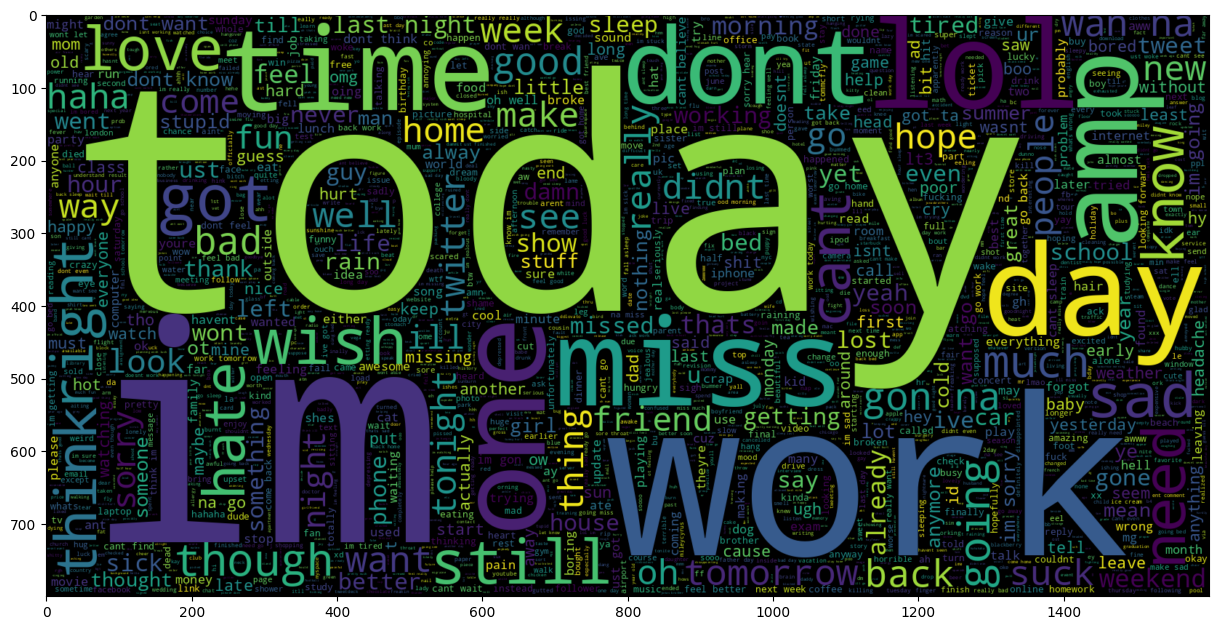

In [193]:
plt.figure(figsize = (15,15))
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(data_copy_1[data_copy_1.polarity == 0].processed_tweets))
plt.imshow(wc , interpolation = 'bilinear')

### ***Word-Cloud for Positive tweets***

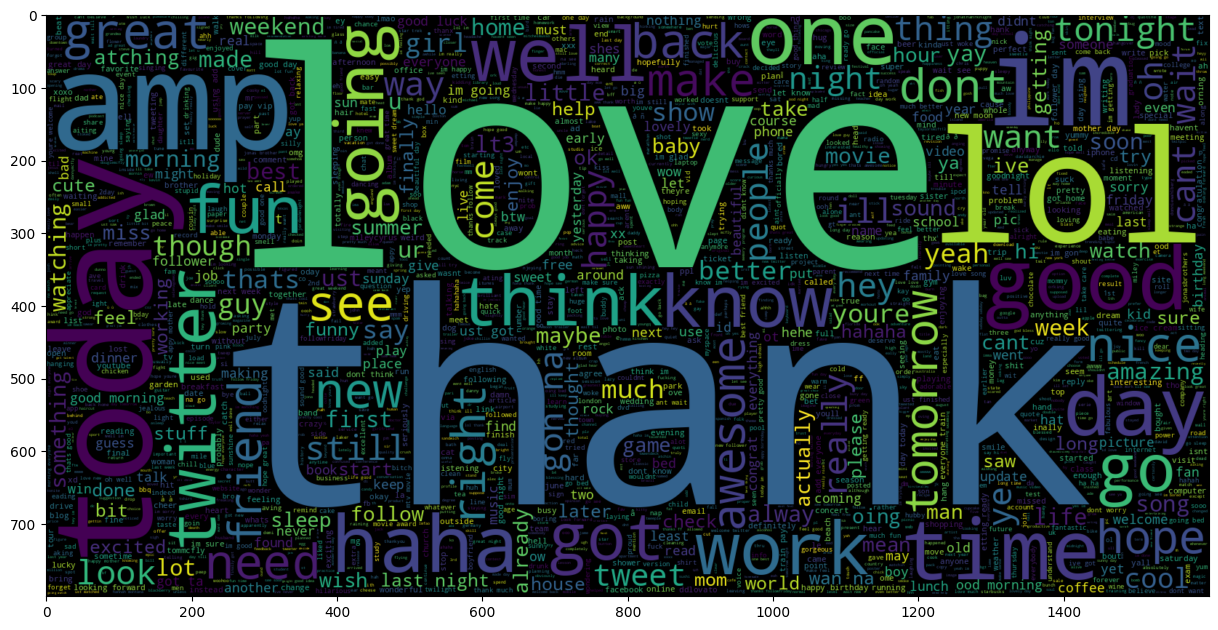

In [194]:
plt.figure(figsize = (15,15))
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(data_copy_1[data_copy_1.polarity == 1].processed_tweets))
plt.imshow(wc , interpolation = 'bilinear')

## ***Vectorization and Spliting the data***

Storing input variable-processes_tweets to X and output variable-polarity to y

In [195]:
X = data_copy_1['processed_tweets'].values
y = data_copy_1['polarity'].values

In [196]:
print(X.shape)
print(y.shape)

(200000,)
(200000,)


## ***Convert text to word frequency vectors***

### ***TF-IDF***
 This is an acronym than stands for **Term Frequency – Inverse Document** Frequency which are the components of the resulting scores assigned to each word.

* Term Frequency: This summarizes how often a given word appears within a document.
* Inverse Document Frequency: This downscales words that appear a lot across documents.

In [197]:
#Convert a collection of raw documents to a matrix of TF-IDF features.
vector = TfidfVectorizer(sublinear_tf=True)
X = vector.fit_transform(X)
print(f'Vector fitted.')
# print('No. of feature_words: ', len(vector.get_feature_names()))

Vector fitted.


In [198]:
print(X.shape)
print(y.shape)

(200000, 170419)
(200000,)


## ***Split train and test***

The Preprocessed Data is divided into 2 sets of data:

* Training Data: The dataset upon which the model would be trained on. Contains 80% data.
* Test Data: The dataset upon which the model would be tested against. Contains 20% data.

In [199]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=101)

In [200]:
print("X_train", X_train.shape)
print("y_train", y_train.shape)
print()
print("X_test", X_test.shape)
print("y_test", y_test.shape)

X_train (160000, 170419)
y_train (160000,)

X_test (40000, 170419)
y_test (40000,)


## ***Model Building***

In [201]:
def model_Evaluate(model):
    #accuracy of model on training data
    acc_train=model.score(X_train, y_train)
    #accuracy of model on test data
    acc_test=model.score(X_test, y_test)

    print('Accuracy of model on training data : {}'.format(acc_train*100))
    print('Accuracy of model on testing data : {} \n'.format(acc_test*100))

    # Predict values for Test dataset
    y_pred = model.predict(X_test)

    # Print the evaluation metrics for the dataset.
    print(classification_report(y_test, y_pred))

    # Compute and plot the Confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred)

    categories  = ['Negative','Positive']
    group_names = ['True Neg','False Pos', 'False Neg','True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]

    labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)

    sns.heatmap(cf_matrix, annot = labels, cmap = 'Reds',fmt = '',
                xticklabels = categories, yticklabels = categories)

    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

### ***Logistic Regression***

Accuracy of model on training data : 83.6325
Accuracy of model on testing data : 77.5925 

              precision    recall  f1-score   support

           0       0.79      0.75      0.77     19802
           1       0.77      0.80      0.78     20198

    accuracy                           0.78     40000
   macro avg       0.78      0.78      0.78     40000
weighted avg       0.78      0.78      0.78     40000



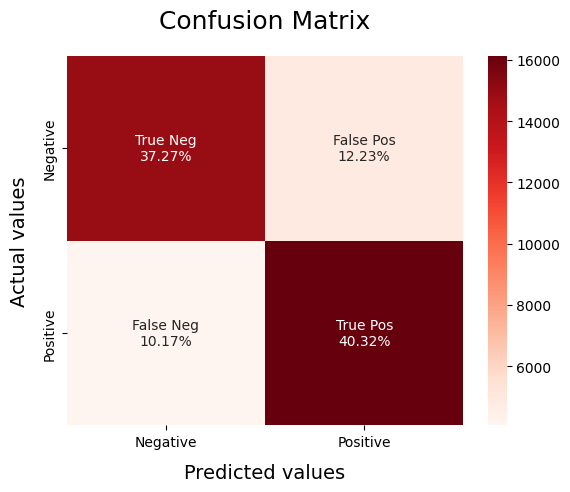

In [202]:
lr = LogisticRegression()
history=lr.fit(X_train, y_train)
model_Evaluate(lr)

### ***Linear SVM***

Accuracy of model on training data : 93.149375
Accuracy of model on testing data : 76.73 

              precision    recall  f1-score   support

           0       0.77      0.75      0.76     19802
           1       0.76      0.78      0.77     20198

    accuracy                           0.77     40000
   macro avg       0.77      0.77      0.77     40000
weighted avg       0.77      0.77      0.77     40000



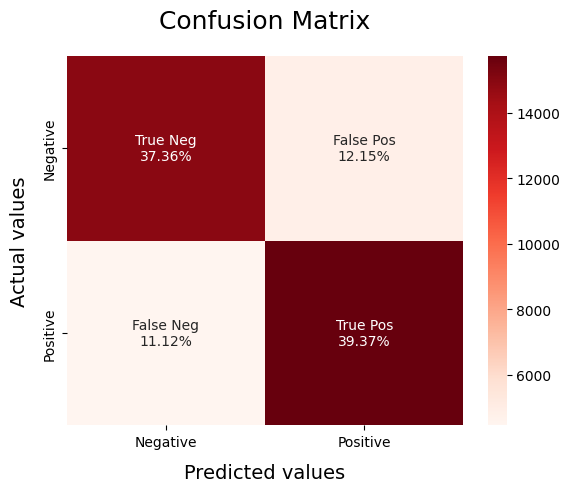

In [203]:
svm = LinearSVC()
svm.fit(X_train, y_train)
model_Evaluate(svm)

### ***Random Forest***

In [204]:
# rf = RandomForestClassifier(n_estimators = 20, criterion = 'entropy', max_depth=50)
# rf.fit(X_train, y_train)
# model_Evaluate(rf)

### ***Naive Bayes***

Accuracy of model on training data : 86.91437499999999
Accuracy of model on testing data : 76.28 

              precision    recall  f1-score   support

           0       0.75      0.79      0.77     19802
           1       0.78      0.74      0.76     20198

    accuracy                           0.76     40000
   macro avg       0.76      0.76      0.76     40000
weighted avg       0.76      0.76      0.76     40000



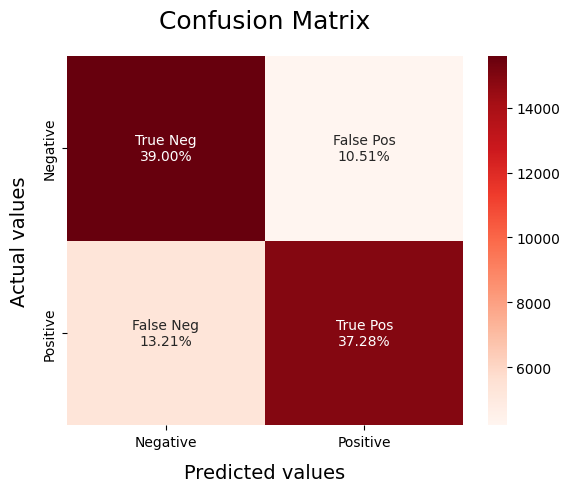

In [205]:
nb = BernoulliNB()
nb.fit(X_train, y_train)
model_Evaluate(nb)

In [206]:
print(X_train.shape)
print(X_test.shape)

(160000, 170419)
(40000, 170419)


### ***LSTM***

In [207]:
!pip install --upgrade keras

In [208]:
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, Dropout
from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
import re

In [209]:
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras import regularizers

max_words = 5000
max_len = 200

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(data_copy_1.processed_tweets)
sequences = tokenizer.texts_to_sequences(data_copy_1.processed_tweets)
tweets = pad_sequences(sequences, maxlen=max_len)
print(tweets)

[[   0    0    0 ...    0    0  759]
 [   0    0    0 ...    1  429    8]
 [   0    0    0 ...    0   44  419]
 ...
 [   0    0    0 ...    0  280   41]
 [   0    0    0 ...    0   17  432]
 [   0    0    0 ... 1430 1352   62]]


In [210]:
# from sklearn.preprocessing import MaxAbsScaler
# mmscaler = MaxAbsScaler()
# tweets = mmscaler.fit_transform(tweets)
# print(tweets)

In [211]:
X_train, X_test, y_train, y_test = train_test_split(tweets, data_copy_1.polarity.values, test_size=0.2, random_state=101)

In [212]:
from keras.models import Sequential
from keras import layers
from keras import regularizers
from keras import backend as K
from keras.callbacks import ModelCheckpoint
model2 = Sequential()
model2.add(layers.Embedding(max_words, 128))
model2.add(layers.LSTM(64,dropout=0.5))
model2.add(layers.Dense(16, activation='relu'))
model2.add(layers.Dense(8, activation='relu'))
model2.add(layers.Dense(1,activation='sigmoid'))
model2.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])
checkpoint2 = ModelCheckpoint("rnn_model.hdf5", monitor='val_accuracy', verbose=1,save_best_only=True, mode='auto', period=1,save_weights_only=False)
history = model2.fit(X_train, y_train, epochs=10,validation_data=(X_test, y_test),callbacks=[checkpoint2])


Epoch 1/10


Cause: Unable to locate the source code of <function Model.make_train_function.<locals>.train_function at 0x782e1393caf0>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: Unable to locate the source code of <function Model.make_train_function.<locals>.train_function at 0x782e1393caf0>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
4999/5000 [============================>.] - ETA: 0s - loss: 0.5056 - accuracy: 0.7502

Cause: Unable to locate the source code of <function Model.make_test_function.<locals>.test_function at 0x782e1393ff40>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: Unable to locate the source code of <function Model.make_test_function.<locals>.test_function at 0x782e1393ff40>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert

Epoch 1: val_accuracy improved from -inf to 0.77035, saving model to rnn_model.hdf5
5000/5000 [==============================] - 103s 20ms/step - loss: 0.5056 - accuracy: 0.7502 - val_loss: 0.4790 - val_accuracy: 0.7703
Epoch 2/10
4998/5000 [============================>.] - ETA: 0s - loss: 0.4646 - accuracy: 0.7774
Epoch 2: val_accuracy improved from 0.77035 to 0.77370, saving model to rnn_model.hdf5
5000/5000 [===========================

In [213]:
# from keras.models import Sequential
# from keras.layers import Embedding, Bidirectional, LSTM, Dense
# from keras.callbacks import ModelCheckpoint, EarlyStopping
# import tensorflow as tf

# # Define the model
# model2 = Sequential()
# model2.add(Embedding(max_words, 128))
# model2.add(Bidirectional(LSTM(64)))
# model2.add(Dense(1, activation='sigmoid'))

# # Compile the model
# model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# # Define callbacks
# checkpoint2 = ModelCheckpoint("rnn_model.hdf5", monitor='val_accuracy', verbose=1, save_best_only=True, mode='auto', period=1, save_weights_only=False)
# early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# # Train the model
# history = model2.fit(X_train, y_train, epochs=10, batch_size=250, validation_data=(X_test, y_test), callbacks=[checkpoint2, early_stopping])

In [214]:
sequence = tokenizer.texts_to_sequences(['this data science article is the worst ever'])
test = pad_sequences(sequence, maxlen=max_len)
pred = model2.predict(test)
if pred > 0.5:
  print('Positive')
else:
  print('Negative')
# print(pred)

Cause: Unable to locate the source code of <function Model.make_predict_function.<locals>.predict_function at 0x782e3fcc23b0>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: Unable to locate the source code of <function Model.make_predict_function.<locals>.predict_function at 0x782e3fcc23b0>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1/1 [==============================] - 0s 369ms/step
Negative


In [215]:
sequence = tokenizer.texts_to_sequences(['this data science article is the worst ever'])
test = pad_sequences(sequence, maxlen=max_len)
pred = model2.predict(test)
if pred > 0.5:
  print('Positive')
else:
  print('Negative')
# print(pred)

1/1 [==============================] - 0s 24ms/step
Negative


In [216]:
sequence = tokenizer.texts_to_sequences(['it is a bad day for work.'])
test = pad_sequences(sequence, maxlen=max_len)
pred = model2.predict(test)
if pred > 0.5:
  print('Positive')
else:
  print('Negative')

1/1 [==============================] - 0s 24ms/step
Negative


### ***Model Comparision***

### ***As Logistic Regression and Naive bayes is overfit, but LSTM is a generalised model, So we prefer LSTM.***

## ***Model Saving, Loading and Prediction***

In [217]:
import pickle

file = open('logisticRegression.pickle','wb')
pickle.dump(lr, file)
file.close()

file = open('NaivesBayes.pickle','wb')
pickle.dump(nb, file)
file.close()

